![](https://media.licdn.com/dms/image/C4D0BAQF_zNBRAuCKeQ/company-logo_200_200/0/1651865722601/ma_ia_solues_tecnolgicas_logo?e=1717632000&v=beta&t=nentckGibUTnnZtNcDMDvoy1l9mMM0HLYHdT_9Q7lNo)
## <span style="color:#4d4d4d">Gabriel Fernandes Carvalho
# <span style="color:#4d4d4d">Detecção de Gatos com Visão Computacional - MA.IA Solutions


# <span style="color:#4d4d4d">1. Introdução</span>
Neste notebook, o desafio será identificar e localizar gatos em imagens usando a arquitetura de detecção de objetos YOLOv8. Serão realizadas as etapas de pré-processamento dos dados, treinamento do modelo, validação e inferência, culminando na detecção eficaz de gatos nas imagens fornecidas.

A escolha do modelo **YOLOv8** é adequada por vários motivos:

**Alta Precisão**: O desafio envolve a detecção de objetos em imagens, para o qual o YOLOv8 é otimizado, oferecendo reconhecimento confiável, essencial para processar o conjunto de dados com eficiência.

**Facilidade de Uso e Integração**: O modelo vem com uma API simples e exemplos de código, facilitando o desenvolvimento e a integração em soluções existentes.

**Desempenho em Diferentes Condições**: O YOLOv8 é projetado para funcionar bem em uma variedade de condições de imagem, o que é relevante dado que o dataset inclui diversas representações de gatos, sozinhos ou com outros animais.

**Recursos e Suporte da Comunidade**: Há amplo suporte comunitário e documentação disponível para o YOLOv8.

Essas características alinham-se às necessidades do desafio de criar um modelo robusto e eficiente para detecção de gatos em imagens variadas.

# <span style="color:#4d4d4d">2. Configuração do Ambiente
Antes da análise e processamento de dados, é essencial configurar nosso ambiente instalando todas as bibliotecas necessárias. Este passo garante que temos todas as ferramentas disponíveis.

In [1]:
!pip install ultralytics
!pip install -U ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 662.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.5/719.5 kB 5.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 1.4 MB/s eta 0:00:00 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipyw

In [2]:
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import shutil
import os

As bibliotecas essenciais para nosso projeto, incluindo `ultralytics` para YOLO e `sklearn` para divisão do conjunto de dados, foram instaladas com sucesso. Agora pode-se começar a analisar e processar os dados.

# <span style="color:#4d4d4d">3. Análise Exploratória dos Dados
## <span style="color:#4d4d4d">3.1 Contagem de Imagens no Dataset
    Iniciaremos nossa análise exploratória contando o número de imagens disponíveis para treinamento e inferência. Isso nos dará uma visão geral do tamanho do nosso conjunto de dados.


In [3]:
imgs_path = '/kaggle/input/cats-dataset/cats_dataset/imgs'
inference_imgs_path = '/kaggle/input/cats-dataset/cats_dataset/inference_imgs'

imgs_files = [file for file in os.listdir(imgs_path) if file.endswith('.jpg') or file.endswith('.png')]
inference_imgs_files = [file for file in os.listdir(inference_imgs_path) if file.endswith('.JPG')]

num_imgs = len(imgs_files)
num_inference_imgs = len (inference_imgs_files)
print(f"Total de imagens disponíveis para treinamento: {num_imgs}")
print(f"Total de imagens disponíveis para inferência: {num_inference_imgs}")

Total de imagens disponíveis para treinamento: 241
Total de imagens disponíveis para inferência: 2


    O resultado indica que temos um total de 241 imagens para treinamento e 2 para inferência, o que nos fornece uma base sólida para construir nosso modelo de detecção de gatos.

## <span style="color:#4d4d4d">3.2 Correspondência entre Imagens e Anotações
    Agora, vamos verificar a correspondência entre imagens e anotações. É crucial que cada imagem tenha um arquivo de anotação correspondente para que o treinamento do modelo possa ser executado corretamente.

In [4]:
labels_path = '/kaggle/input/cats-dataset/cats_dataset/labels'

label_files = [file for file in os.listdir(labels_path) if file.endswith('.txt')]

num_labels = len(label_files)
print(f"Total de anotações disponíveis: {num_labels}")

missing_labels = [img for img in imgs_files if img.replace('.jpg', '.txt').replace('.png', '.txt') not in label_files]
missing_imgs = [label for label in label_files if label.replace('.txt', '.jpg').replace('.txt', '.png') not in imgs_files]

print(f"Imagens sem anotação correspondente: {len(missing_labels)}")
print(f"Anotações sem imagem correspondente: {len(missing_imgs)}")

Total de anotações disponíveis: 241
Imagens sem anotação correspondente: 0
Anotações sem imagem correspondente: 0


    Todas as imagens têm suas anotações correspondentes, e não há anotações sem imagens correspondentes. Isso confirma que nosso conjunto de dados está completo e pronto para a próxima etapa.


## <span style="color:#4d4d4d">3.3 Análise dos Arquivos de Anotação
    A seguir, analisaremos o conteúdo dos arquivos de anotação para garantir que estejam formatados corretamente. Isso envolve ler e exibir as coordenadas das bounding boxes.


In [5]:
example_label_file = label_files[0]
with open(os.path.join(labels_path, example_label_file), 'r') as file:
    example_labels = file.readlines()

print(f"Exemplo de anotações do arquivo {example_label_file}:\n", example_labels)

Exemplo de anotações do arquivo cats_groups_012.txt:
 ['0 0.17932489451476794 0.7260536398467433 0.16877637130801687 0.41762452107279696\n', '0 0.2742616033755274 0.5498084291187739 0.3080168776371308 0.7318007662835249\n', '0 0.4820675105485232 0.6954022988505747 0.1540084388185654 0.44061302681992337\n', '0 0.5854430379746836 0.5613026819923371 0.14556962025316456 0.6781609195402298\n', '0 0.7827004219409283 0.7126436781609196 0.3206751054852321 0.4367816091954023\n']


    As anotações do arquivo mostram as coordenadas das bounding boxes em formato normalizado, o que é compatível com a entrada necessária para o modelo YOLOv8.


## <span style="color:#4d4d4d">3.4 Visualização das Anotações
    Para garantir que as anotações estão corretas, visualizaremos as bounding boxes sobrepostas em algumas imagens de exemplo. Isso nos ajuda a confirmar visualmente a precisão das anotações.

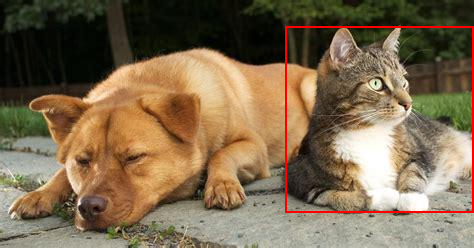

In [6]:
def draw_bounding_boxes(image_path, annotation_lines):
    with Image.open(image_path) as im:
        draw = ImageDraw.Draw(im)
        for annotation in annotation_lines:
            class_id, x_center, y_center, width, height = map(float, annotation.split())
            x1 = (x_center - width / 2) * im.width
            y1 = (y_center - height / 2) * im.height
            x2 = (x_center + width / 2) * im.width
            y2 = (y_center + height / 2) * im.height
            draw.rectangle(((x1, y1), (x2, y2)), outline="red", width=2)
        return im

sample_image_path = os.path.join(imgs_path, imgs_files[130])
sample_label_path = os.path.join(labels_path, imgs_files[130].replace('.jpg', '.txt'))

with open(sample_label_path, 'r') as file:
    sample_annotations = file.readlines()

drawn_image = draw_bounding_boxes(sample_image_path, sample_annotations)
drawn_image


    As bounding boxes foram desenhadas corretamente sobre a imagem, indicando que nossas anotações estão no formato correto e que o modelo poderá interpretá-las apropriadamente durante o treinamento.


# <span style="color:#4d4d4d">4. Pré-processamento dos Dados

## <span style="color:#4d4d4d">4.1 Divisão dos Dados

    A correta divisão do dataset é essencial para um treinamento eficaz e uma validação justa do modelo. Aqui dividimos o conjunto de imagens em três partes distintas: treinamento (80%), validação (10%) e teste (10%). Esta organização dos dados nos ajudará a minimizar o sobreajuste e a verificar o desempenho do modelo em dados não vistos.

In [7]:
files = [os.path.splitext(file)[0] for file in os.listdir(imgs_path) if file.endswith('.jpg')]

train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)
val_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)

def prepare_data(files, dataset_type, imgs_path, labels_path):
    os.makedirs(f'/kaggle/working/{dataset_type}/images', exist_ok=True)
    os.makedirs(f'/kaggle/working/{dataset_type}/labels', exist_ok=True)
    for file in files:
        img_src = os.path.join(imgs_path, file + '.jpg')
        label_src = os.path.join(labels_path, file + '.txt')
        shutil.copy(img_src, f'/kaggle/working/{dataset_type}/images/')
        shutil.copy(label_src, f'/kaggle/working/{dataset_type}/labels/')

prepare_data(train_files, 'train', imgs_path, labels_path)
prepare_data(val_files, 'val', imgs_path, labels_path)
prepare_data(test_files, 'test', imgs_path, labels_path)

    Os dados foram divididos com sucesso nas proporções definidas. Os conjuntos de treinamento, validação e teste estão prontos, com as imagens e anotações alocadas para cada fase do processo de modelagem.

## <span style="color:#4d4d4d">4.2 Preparação para o Treinamento

    Antes de iniciar o treinamento, deve-se configurar o arquivo YAML que descreverá os caminhos das imagens e anotações para cada conjunto de dados. Este arquivo serve como uma espécie de mapa para o YOLOv8, permitindo que o modelo saiba onde encontrar os dados necessários para o treinamento e a validação.

In [8]:
yaml_content = f"""
train: /kaggle/working/train/images
val: /kaggle/working/val/images
test: /kaggle/working/test/images

nc: 1
names: ['cat']
"""

with open('/kaggle/working/dataset.yaml', 'w') as yaml_file:
    yaml_file.write(yaml_content)


    O arquivo YAML necessário para o treinamento do modelo YOLOv8 foi criado. Ele contém os caminhos para os diretórios de treinamento, validação e teste, além da definição da classe que o modelo deve detectar.


# <span style="color:#4d4d4d">5. Treinamento do Modelo YOLOv8

Após configurar o ambiente e preparar os dados, iniciaremos o treinamento do modelo YOLOv8. Essa etapa é fundamental para aprender as características visuais dos gatos em diversas imagens e contextos. Neste momento, também nos certificamos de remover qualquer dependência desnecessária, como o `wandb`, que pode causar conflitos durante o treinamento, conforme mencionado na issue [#2073 do GitHub](https://github.com/ultralytics/ultralytics/issues/2073).


In [9]:
!pip3 uninstall -y wandb

Found existing installation: wandb 0.16.3
Uninstalling wandb-0.16.3:
  Successfully uninstalled wandb-0.16.3


A desinstalação do `wandb` foi bem-sucedida, evitando os problemas conhecidos de incompatibilidade com a biblioteca Ultralytics durante o treinamento do modelo.

Prosseguimos para o treinamento do modelo utilizando a arquitetura YOLOv8. Nesse processo, definimos os parâmetros essenciais para o treinamento, incluindo o número de épocas, o tamanho do lote, a dimensão da imagem, a utilização de data augmentation, entre outros. Utilizamos um modelo pré-treinado YOLOv8m para acelerar a convergência e melhorar a precisão. O treinamento é feito com o objetivo de ajustar os pesos do modelo às particularidades do nosso conjunto de dados.

In [10]:
dataset_yaml = '/kaggle/working/dataset.yaml'

model = YOLO('yolov8m.pt')

results = model.train(data=dataset_yaml, epochs=50, batch=16, imgsz=640, device=0, augment=True,verbose=True, cache=True)

100%|██████████| 49.7M/49.7M [00:00<00:00, 212MB/s]


Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 14.2MB/s]
2024-03-07 12:01:14.660890: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 12:01:14.660992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 12:01:14.840490: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 69.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/train/labels... 192 images, 4 backgrounds, 0 corrupt: 100%|██████████| 192/192 [00:00<00:00, 1149.02it/s]

train: New cache created: /kaggle/working/train/labels.cache



train: Caching images (0.2GB True): 100%|██████████| 192/192 [00:00<00:00, 603.35it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/val/labels... 24 images, 1 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 1154.54it/s]

val: New cache created: /kaggle/working/val/labels.cache



val: Caching images (0.0GB True): 100%|██████████| 24/24 [00:00<00:00, 372.43it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.09G      1.017      2.155      1.396         68        640: 100%|██████████| 12/12 [00:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all         24         52      0.421      0.327        0.3      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.27G      1.092      1.585      1.468         72        640: 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         24         52       0.54      0.497      0.474      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       7.3G      1.113      1.501      1.466        105        640: 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         24         52      0.119      0.365      0.113     0.0411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.29G      1.314      1.727      1.702         66        640: 100%|██████████| 12/12 [00:05<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         24         52      0.134      0.635      0.133     0.0502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.31G      1.408      1.671      1.727         71        640: 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         24         52     0.0161      0.192     0.0123    0.00435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.25G      1.369      1.684       1.71         55        640: 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         24         52       0.15      0.231      0.102     0.0349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.25G      1.462      1.665      1.799         80        640: 100%|██████████| 12/12 [00:05<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         24         52     0.0305      0.212     0.0189    0.00717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.25G       1.44      1.746      1.751         84        640: 100%|██████████| 12/12 [00:05<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         24         52   0.000928     0.0962   0.000405   0.000244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.25G      1.446      1.627      1.729         77        640: 100%|██████████| 12/12 [00:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         24         52     0.0167     0.0769     0.0088    0.00294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.27G      1.442      1.658      1.748         53        640: 100%|██████████| 12/12 [00:05<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         24         52       0.11      0.212      0.074     0.0237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       7.3G      1.464       1.71      1.751        107        640: 100%|██████████| 12/12 [00:05<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         24         52     0.0114      0.481    0.00948    0.00348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.31G      1.383      1.674      1.676         62        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         24         52    0.00106     0.0577   0.000333   0.000123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.25G      1.295      1.534      1.611         88        640: 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         24         52     0.0945      0.212     0.0526     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       7.3G      1.271       1.45       1.57         64        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         24         52      0.148      0.269      0.116     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.27G      1.251      1.421      1.538        103        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         24         52      0.607      0.476      0.476      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.29G      1.191      1.379       1.53         40        640: 100%|██████████| 12/12 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         24         52      0.672      0.654       0.66      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.25G       1.22      1.402       1.58         67        640: 100%|██████████| 12/12 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         24         52      0.675      0.577      0.638      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.29G      1.143      1.302      1.494         66        640: 100%|██████████| 12/12 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         24         52      0.614      0.577      0.627      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.27G       1.18      1.378       1.54         68        640: 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         24         52      0.666      0.538      0.626      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.25G      1.172      1.385      1.548         62        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         24         52      0.653      0.558      0.502      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.25G      1.115      1.329      1.514         62        640: 100%|██████████| 12/12 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         24         52      0.494      0.558      0.526      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.27G      1.116        1.3       1.46         62        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         24         52      0.572      0.635      0.561      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.25G      1.012      1.242      1.419         86        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         24         52      0.544      0.692      0.623      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.28G       1.07      1.188      1.429         67        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         24         52       0.67      0.586      0.602      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.28G      1.012      1.191      1.395         63        640: 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         24         52      0.739      0.615      0.714      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.27G     0.9611      1.129      1.375         55        640: 100%|██████████| 12/12 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         24         52      0.713      0.769      0.802      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.29G     0.9926      1.154      1.418         63        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         24         52       0.79      0.722      0.815      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.25G       0.99      1.111      1.424         55        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         24         52      0.672      0.748      0.744      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.25G     0.9895      1.091      1.403         72        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         24         52      0.814      0.673      0.785      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       7.3G     0.9546      1.074      1.373         71        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         24         52       0.79      0.712      0.796      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.25G     0.9555      1.062      1.387         56        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         24         52      0.698      0.731      0.738      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       7.3G     0.9345      1.024      1.345         61        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         24         52      0.831      0.596      0.764       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.28G     0.8876      1.027      1.332         62        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         24         52      0.684      0.673      0.731      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.25G      0.897     0.9538      1.316         53        640: 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         24         52      0.826      0.673      0.794      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.28G     0.8941     0.9564      1.344         74        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         24         52      0.684      0.788      0.809      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.25G     0.8355      0.929      1.273         52        640: 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         24         52      0.695      0.808      0.854      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       7.3G     0.8209       0.88      1.282         56        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         24         52      0.922      0.788       0.88      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.29G     0.8445     0.9093      1.292         45        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         24         52      0.848      0.769      0.837      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.24G     0.8057     0.8747      1.247         98        640: 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         24         52      0.804      0.787      0.818      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.25G      0.778     0.8417       1.24         72        640: 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         24         52      0.808      0.712      0.818       0.53


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       7.3G     0.7318     0.8562      1.217         23        640: 100%|██████████| 12/12 [00:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         24         52      0.824      0.719      0.817      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.25G     0.7263     0.8385      1.194         43        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         24         52      0.852      0.776      0.851      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.25G     0.7014     0.7499      1.204         24        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         24         52      0.926      0.673      0.845      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.25G      0.595     0.6604      1.096         19        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         24         52      0.897       0.75      0.859      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.29G     0.6237      0.644      1.134         22        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         24         52       0.91      0.774      0.878      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.25G     0.6095      0.623       1.12         27        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         24         52      0.868       0.76      0.859      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.25G     0.5976     0.5896      1.094         18        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         24         52       0.91      0.778      0.874      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       7.3G     0.5821      0.588      1.114         31        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         24         52      0.922      0.769      0.887      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.25G     0.5706     0.5725       1.09         25        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         24         52       0.89      0.775      0.887      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.25G     0.5457     0.5662      1.097         24        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         24         52      0.944      0.769      0.895      0.662



50 epochs completed in 0.121 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


                   all         24         52      0.953      0.846      0.929      0.709
Speed: 0.2ms preprocess, 32.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


Os resultados do treinamento são salvos automaticamente pelo framework Ultralytics. Os pesos do modelo com melhor desempenho são armazenados para uso posterior em inferências. Este procedimento permite a reutilização eficiente do modelo treinado, sem a necessidade de repetir o treinamento.

# <span style="color:#4d4d4d">6. Avaliação do Modelo YOLOv8m nos Dados de Teste
    
Avaliamos a performance do modelo nos dados de teste para entender como ele se comporta com imagens que não foram usadas durante o treinamento. Isso nos dá uma medida objetiva de como o modelo pode performar no mundo real, onde enfrentará cenários variados e não vistos anteriormente.


In [11]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

test_results = model.val(split='test')

Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/working/test/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 1156.55it/s]

val: New cache created: /kaggle/working/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]


                   all         25         54      0.743      0.926      0.903      0.656
Speed: 0.2ms preprocess, 44.1ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val


Os resultados da avaliação nos dão importantes métricas de desempenho, como precisão média e recall. Com essas informações, podemos entender melhor quais aspectos do modelo podem ser aprimorados e como ele pode ser ajustado para melhorar a detecção em casos desafiadores.

# <span style="color:#4d4d4d">7. Inferências com o Modelo YOLOv8m
    
Com o modelo treinado e avaliado, agora realizaremos inferências em novas imagens para ver o modelo em ação. Esta etapa ilustra a aplicação prática do YOLOv8, permitindo visualizar como ele identifica e localiza gatos nas imagens, refletindo seu desempenho no mundo real.


In [28]:
results = model.predict('/kaggle/input/cats-dataset/cats_dataset/inference_imgs', conf=0.2, augment=True, iou=0.5)


image 1/2 /kaggle/input/cats-dataset/cats_dataset/inference_imgs/405340C1-2E2D-4DA3-889F-14583CFFCEE8.JPG: 640x384 1 cat, 73.1ms
image 2/2 /kaggle/input/cats-dataset/cats_dataset/inference_imgs/E4F48723-FCE8-45F6-AC7E-4977A4E3EEEA.JPG: 640x480 1 cat, 79.1ms
Speed: 2.4ms preprocess, 76.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


In [29]:
for result in results:
    result.save()

Com as inferências concluídas, salvamos os resultados que incluem as imagens com as bounding boxes e as classificações previstas pelo modelo. Estas imagens oferecem uma visão clara de como o modelo interpreta novas entradas e a precisão de suas detecções.


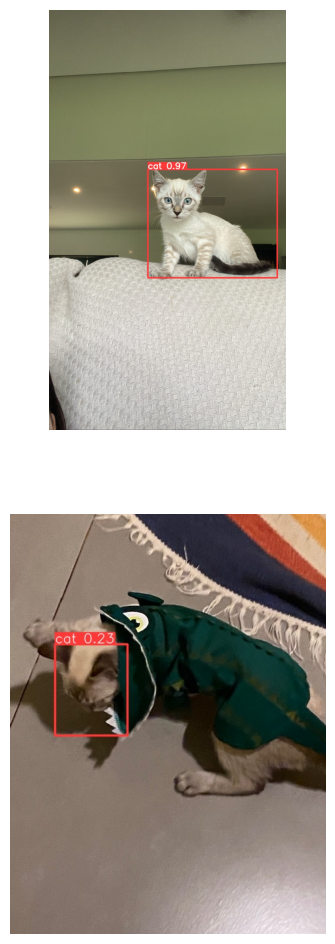

In [30]:
img_path1 = '/kaggle/working/results_405340C1-2E2D-4DA3-889F-14583CFFCEE8.JPG'
img_path2 = '/kaggle/working/results_E4F48723-FCE8-45F6-AC7E-4977A4E3EEEA.JPG'

img1 = Image.open(img_path1)
img2 = Image.open(img_path2)

fig, axs = plt.subplots(2, 1, figsize=(6, 12))

axs[0].imshow(img1)
axs[0].axis('off') 

axs[1].imshow(img2)
axs[1].axis('off')

plt.show()

Na última imagem inferida, o modelo identificou apenas a cabeça do gato. Isso destaca uma limitação interessante e uma área de potencial melhoria. Como o conjunto de treinamento não incluiu gatos com roupas, o modelo não aprendeu a reconhecer essa situação específica como uma única entidade. No entanto, o fato de identificar características distintas de gatos, como a cabeça, demonstra que o modelo aprendeu aspectos cruciais de sua forma geral e pode ser refinado com um conjunto de dados mais variado para melhorar ainda mais a precisão.